# **PREDICCIÓN DE POPULARIDAD DE UN ÁLBUM MUSICAL**
## FACUNDO MURUCHI

### OBJETIVO
El objetivo de este proyecto es desarrollar un modelo predictivo capaz de predecir el porcentaje de popularidad de un album musical del 0% al 100% a traves de un aprendizaje supervisado utilizando metodos de regresión sobre datos extraídos del servicio API de Spotify

# Atributos
* ID: Numero identificador de cada fila
* Name: Nombre del album
* Release Date: Fecha de lanzamiento
* Artists: Artistas
* Total_tracks: Cantidad de canciones
* Duration: Duracion de cancion (ms)
* Danceability: Bailabilidad del 0.0 al 1.0
* Energy: Energía/intensidad del 0.0 al 1.0
* Key: Tonalidad
* Mode: Modo mayor (1) o menor (0)
* Acousticness: Acustica del 0.0 al 1
* Instrumentalness: Probabilidad de ser solo instrumental del 0.0 al 1.0
* Valence: Positividad del 0.0 al 1.0
* Tempo: BPM de la cancion
* Time Signature: Compás estimado de la cancion

# IMPORTACIONES

In [ ]:
# EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# MODELADO
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

# ALGORITMOS
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#LECTURA DEL DATASET

In [ ]:
# IMPORTACIÓN DE DATASET
df = pd.read_csv('/content/drive/MyDrive/PreEntrega-FacundoMuruchi/music_popularity_train.csv')

In [ ]:
# UBICAR COLUMNA ID COMO INDICE
df = df.set_index('id')

In [ ]:
# ELIMINACIÓN DE COLUMNAS INNECESARIAS PARA EL MODELO
df = df.drop(['name', 'release_date', 'artists', 't_name0', 't_name1', 't_name2'], axis=1)

In [ ]:
# MUESTRA DE LOS 5 PRIMEROS ELEMENTOS DEL DATASET
df.head()

,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
id,,,,,,,,,,,,,,,,,,,,,
0,7,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,...,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,18,158826,188480.0,238293.0,0.814,0.826,0.697,0.566,0.816,0.593,...,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,14,118066,185946.0,160293.0,0.357,0.638,0.670,0.238,0.523,0.700,...,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,11,203693,202533.0,205373.0,0.640,0.629,0.616,0.707,0.721,0.327,...,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,169973,163000.0,89106.0,0.773,0.488,0.653,0.437,0.311,0.159,...,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [ ]:
# COLUMNAS RESTANTES
df.columns

Index(['total_tracks', 't_dur0', 't_dur1', 't_dur2', 't_dance0', 't_dance1',
       't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0', 't_key1',
       't_key2', 't_mode0', 't_mode1', 't_mode2', 't_speech0', 't_speech1',
       't_speech2', 't_acous0', 't_acous1', 't_acous2', 't_ins0', 't_ins1',
       't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1', 't_val2',
       't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1', 't_sig2',
       'popularity'],
      dtype='object')

In [ ]:
# DATOS GENERALES DE CADA COLUMNA
df.describe()

,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
count,160000.000000,1.600000e+05,1.122840e+05,1.084670e+05,159786.000000,112159.000000,108390.000000,159786.000000,112159.000000,108390.000000,...,159786.000000,112159.000000,108390.000000,159786.000000,112159.000000,108390.000000,159786.000000,112159.000000,108390.000000,160000.000000
mean,11.004150,1.991346e+05,2.135132e+05,2.143228e+05,0.606401,0.608607,0.609624,0.605095,0.628722,0.616425,...,0.468572,0.493100,0.485054,119.736980,121.096000,120.600622,3.896737,3.909735,3.902546,47.034306
std,23.007852,1.160741e+05,1.112099e+05,9.868120e+04,0.184056,0.177404,0.179375,0.236601,0.232821,0.231022,...,0.255854,0.249949,0.252814,31.188965,30.459428,30.928580,0.510577,0.436034,0.465309,22.511931
min,1.000000,1.485000e+03,4.120000e+03,4.285000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.508040e+05,1.688312e+05,1.693190e+05,0.490000,0.499000,0.500000,0.458000,0.489000,0.477000,...,0.261000,0.299000,0.289000,95.514000,96.700000,96.000000,4.000000,4.000000,4.000000,29.000000
50%,10.000000,1.920520e+05,2.036260e+05,2.064400e+05,0.630000,0.631000,0.628000,0.633000,0.660000,0.648000,...,0.460000,0.499000,0.482000,119.987000,120.018000,119.984000,4.000000,4.000000,4.000000,50.000000
75%,14.000000,2.336000e+05,2.426525e+05,2.449730e+05,0.745000,0.737000,0.743000,0.792000,0.811000,0.792000,...,0.670000,0.689000,0.682000,140.015000,141.179000,141.015000,4.000000,4.000000,4.000000,66.000000
max,1190.000000,1.082819e+07,7.054236e+06,6.145123e+06,0.988000,0.992000,0.982000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,239.713000,248.500000,246.322000,5.000000,5.000000,5.000000,100.000000


In [ ]:
# FILAS X COLUMNAS
df.shape

(160000, 38)

In [ ]:
# INFORMACION GENERAL
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160000 entries, 0 to 159999
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   total_tracks  160000 non-null  int64  
 1   t_dur0        160000 non-null  int64  
 2   t_dur1        112284 non-null  float64
 3   t_dur2        108467 non-null  float64
 4   t_dance0      159786 non-null  float64
 5   t_dance1      112159 non-null  float64
 6   t_dance2      108390 non-null  float64
 7   t_energy0     159786 non-null  float64
 8   t_energy1     112159 non-null  float64
 9   t_energy2     108390 non-null  float64
 10  t_key0        159786 non-null  float64
 11  t_key1        112159 non-null  float64
 12  t_key2        108390 non-null  float64
 13  t_mode0       159786 non-null  float64
 14  t_mode1       112159 non-null  float64
 15  t_mode2       108390 non-null  float64
 16  t_speech0     159786 non-null  float64
 17  t_speech1     112159 non-null  float64
 18  t_speech2

# CORRELACION

Text(0, 0.5, 'Popularidad')

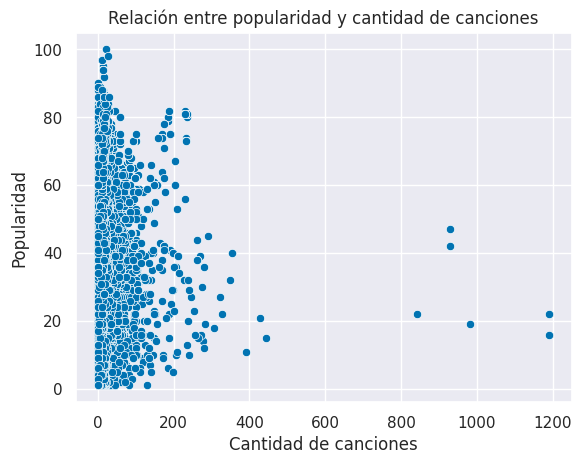

In [ ]:
sns.scatterplot(data=df, x='total_tracks', y='popularity')
plt.title('Relación entre popularidad y cantidad de canciones')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Popularidad')

Este gráfico nos muestra que los picos de popularidad de los albumes de la muestra se situan cerca del 100% cuando tienen menos canciones. A su vez, se muestran datos outliers en los que se profundizarán en la siguiente etapa

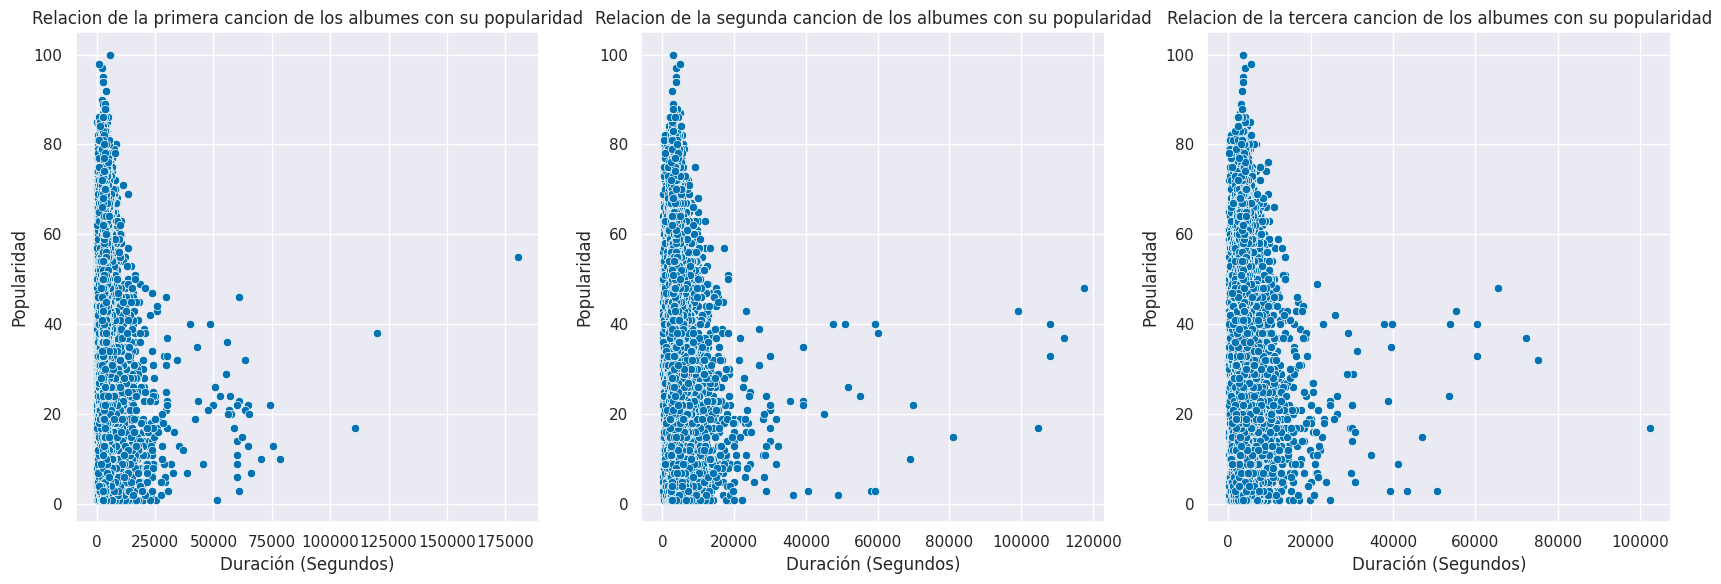

In [ ]:
sns.set_theme(palette='colorblind')
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(17, 6))

# Convertir los milisegundos a segundos
df['duracion_0_segundos'] = df['t_dur0'] / 60
df['duracion_1_segundos'] = df['t_dur1'] / 60
df['duracion_2_segundos'] = df['t_dur2'] / 60

# Graficar el primer gráfico en el primer subplot
sns.scatterplot(df, x='duracion_0_segundos', y='popularity', ax=axes[0])
axes[0].set_title('Relacion de la primera cancion de los albumes con su popularidad')

# Graficar el segundo gráfico en el segundo subplot
sns.scatterplot(df, x='duracion_1_segundos', y='popularity', ax=axes[1])
axes[1].set_title('Relacion de la segunda cancion de los albumes con su popularidad')

# Graficar el tercer gráfico en el tercer subplot
sns.scatterplot(df, x='duracion_2_segundos', y='popularity', ax=axes[2])
axes[2].set_title('Relacion de la tercera cancion de los albumes con su popularidad')

axes[0].set_xlabel('Duración (Segundos)')
axes[1].set_xlabel('Duración (Segundos)')
axes[2].set_xlabel('Duración (Segundos)')

axes[0].set_ylabel('Popularidad')
axes[1].set_ylabel('Popularidad')
axes[2].set_ylabel('Popularidad')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

# ELIMINACION DE ATRIBUTOS TEMPORALES
df= df.drop(['duracion_0_segundos', 'duracion_1_segundos', 'duracion_2_segundos'], axis=1)

Por ultimo, este grafico muestra la relacion entre la popularidad y duracion de las canciones de la muestra, en el cual se nota una tendencia hacia las canciones de menor duracion a comparacion de las mas largas, con la presencia de datos atípicos al costado derecho que resultan ser demasiado altas para una cancion normal.

# DUPLICADOS

## UBICACION DE DUPLICADOS

In [ ]:
# TOMAMOS 2 ATRIBUTOS DE UNO DE LOS ÁLBUMES COMO EJEMPLO
df[(df['t_dur2'] == 165586.0) & (df['t_energy2'] == 0.567)]

,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
id,,,,,,,,,,,,,,,,,,,,,
0,7,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,...,0.626,0.878,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51
50075,7,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,...,0.626,0.878,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51
130573,7,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,...,0.626,0.878,0.833,74.924,126.97,197.836,4.0,3.0,3.0,51


In [ ]:
# CANTIDAD DE ELEMENTOS DUPLICADOS
print(sum(df.duplicated()))

87646


Como se puede ver, hay una cerca de 90.000 elementos duplicados que, incluso teniendo distintos ID, contienen exactamente la misma informacion. Sin embargo, luego de distintas pruebas se ha comprobado que la eliminacion de estos afecta negativamente al rendimiento del algoritmo de prediccion, por lo que no se eliminarán.

# OUTLIERS

## UBICACION DE OUTLIERS

### OUTLIERS DE LA DURACION

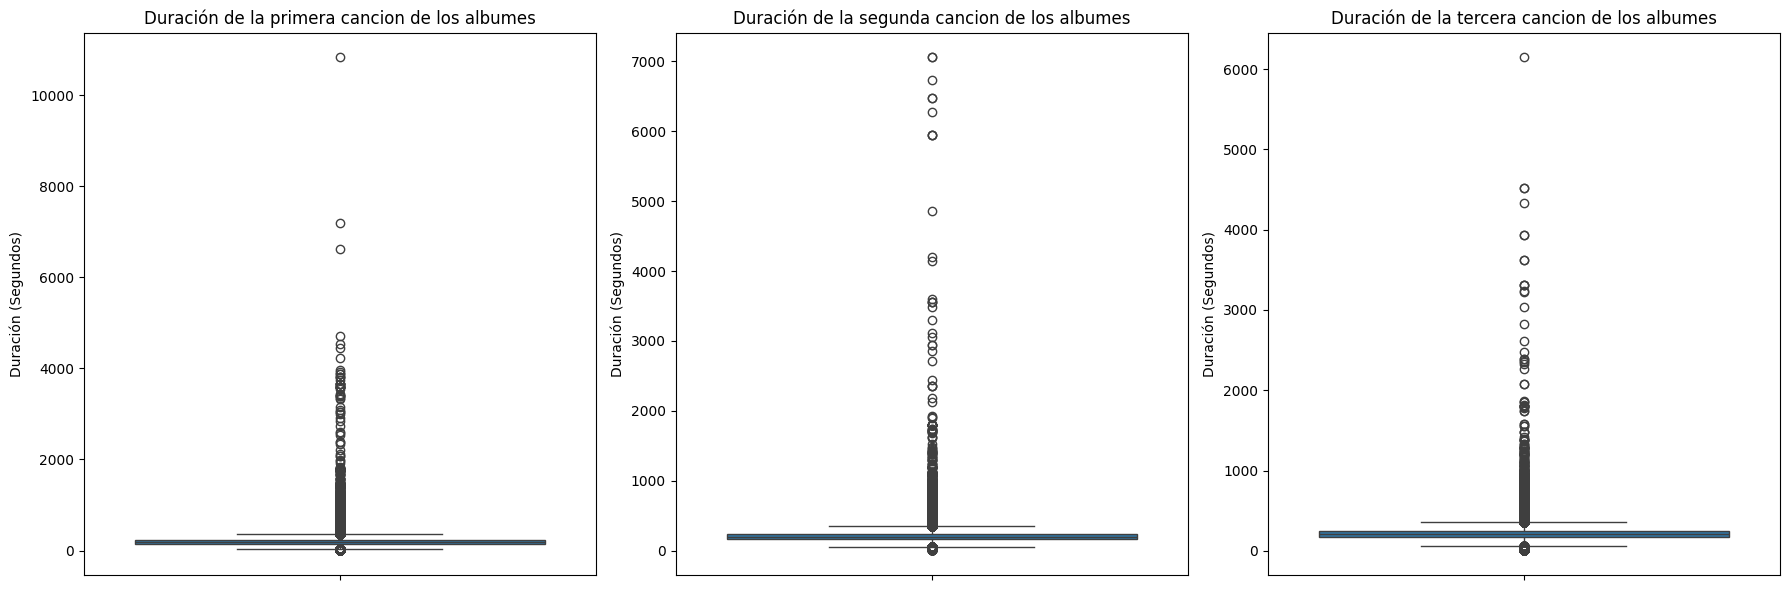

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Convertir los milisegundos a segundos
df['duracion_0_segundos'] = df['t_dur0'] / 1000
df['duracion_1_segundos'] = df['t_dur1'] / 1000
df['duracion_2_segundos'] = df['t_dur2'] / 1000

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='duracion_0_segundos', ax=axes[0])
axes[0].set_title('Duración de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='duracion_1_segundos', ax=axes[1])
axes[1].set_title('Duración de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='duracion_2_segundos', ax=axes[2])
axes[2].set_title('Duración de la tercera cancion de los albumes')

axes[0].set_ylabel('Duración (Segundos)')
axes[1].set_ylabel('Duración (Segundos)')
axes[2].set_ylabel('Duración (Segundos)')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

# ELIMINACION DE ATRIBUTOS TEMPORALES
df= df.drop(['duracion_0_segundos', 'duracion_1_segundos', 'duracion_2_segundos'], axis=1)

Como se muestran en los graficos de duracion de las primeras 3 canciones de los albumes, hay una gran cantidad de datos atípicos, muy extraños para este contexto y que deben ser eliminados por su larga duracion

### OUTLIERS DEL TEMPO

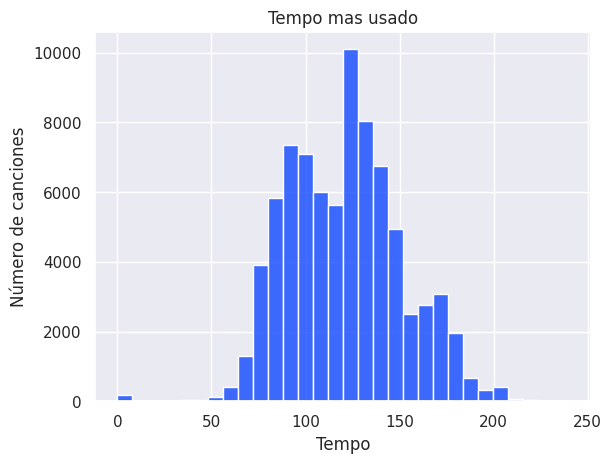

In [ ]:
sns.set_theme(palette='bright')
sns.histplot(data=df, x='t_tempo0', bins=30)
plt.title('Tempo mas usado')
plt.xlabel('Tempo')
plt.ylabel('Número de canciones')
plt.show()

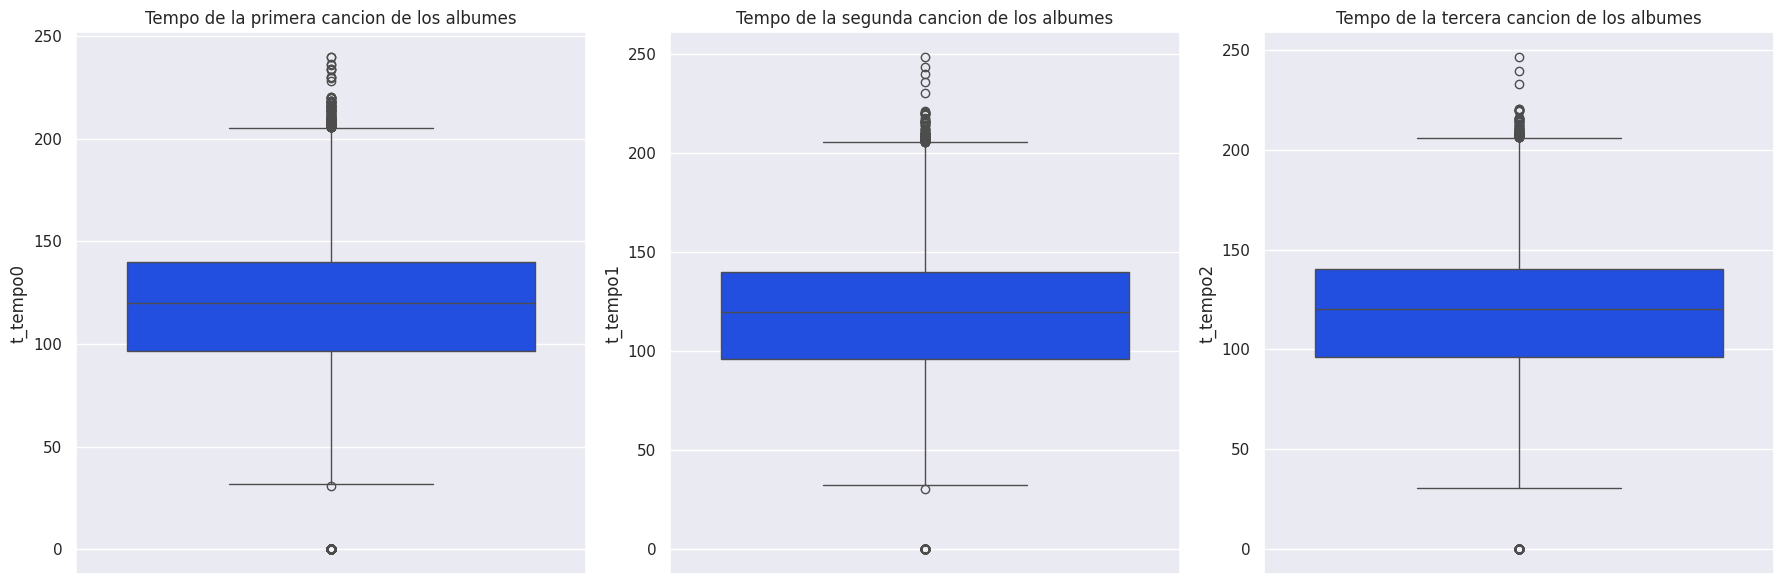

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='t_tempo0', ax=axes[0])
axes[0].set_title('Tempo de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='t_tempo1', ax=axes[1])
axes[1].set_title('Tempo de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='t_tempo2', ax=axes[2])
axes[2].set_title('Tempo de la tercera cancion de los albumes')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

Los gráficos previos muestran valores respecto al tempo utilizado en todas las canciones de la muestra. De esta manera, se hace notar una tendencia a la utilizacion de valores rondando 125BPM, mientras que se muestra su concentracion entre los 100 y 150BPM y datos outliers por arriba de los 200 (lo cual puede ser comun dependiendo el género musical), y datos outliers cerca de 0BPM, algo totalmente imposible para ser utilizado en la composición de una canción y que deberan ser eliminados en la proxima etapa

### OUTLIERS DE LA CANTIDAD DE CANCIONES

<Axes: xlabel='total_tracks', ylabel='Count'>

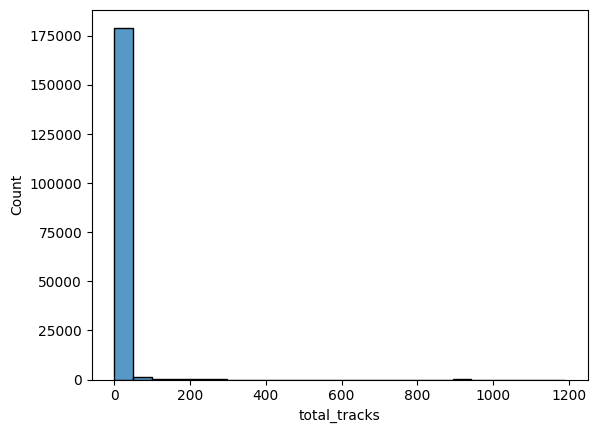

In [ ]:
sns.histplot(data=df, x='total_tracks', bins=24)
plt.title('Cantidad de canciones por album')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Popularidad')

Text(0, 0.5, 'Cantidad de canciones')

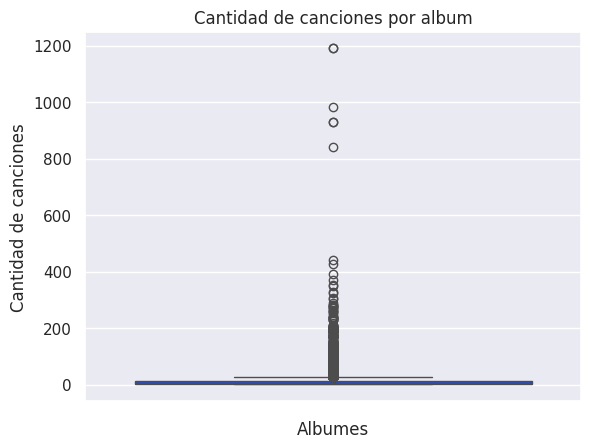

In [ ]:
sns.boxplot(data=df, y='total_tracks')
plt.title('Cantidad de canciones por album')
plt.xlabel('Albumes')
plt.ylabel('Cantidad de canciones')

In [ ]:
df[df['total_tracks'] > 1000]

,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,...,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2
id,,,,,,,,,,,,,,,,,,,,,
18240,1190,18588,292916.0,210516.0,0.619,0.682,0.714,0.12,0.291,0.277,...,0.356,0.907,0.627,0.584,189.96,99.417,111.069,3.0,3.0,4.0
62529,1190,18588,313250.0,207176.0,0.619,0.532,0.625,0.12,0.384,0.418,...,0.232,0.907,0.628,0.739,189.96,86.022,84.289,3.0,3.0,4.0


En este punto se logra identificar datos outliers en cuanto a la cantidad de canciones por album, ya que se logran encontrar albumes con mas de 200 o incluso 1000 canciones, algo increiblemente extraño dentro del contexto de este analisis. Por tal motivo, estos datos atipicos deberan ser eliminados posteriormente.

### OUTLIERS DE BAILABILIDAD

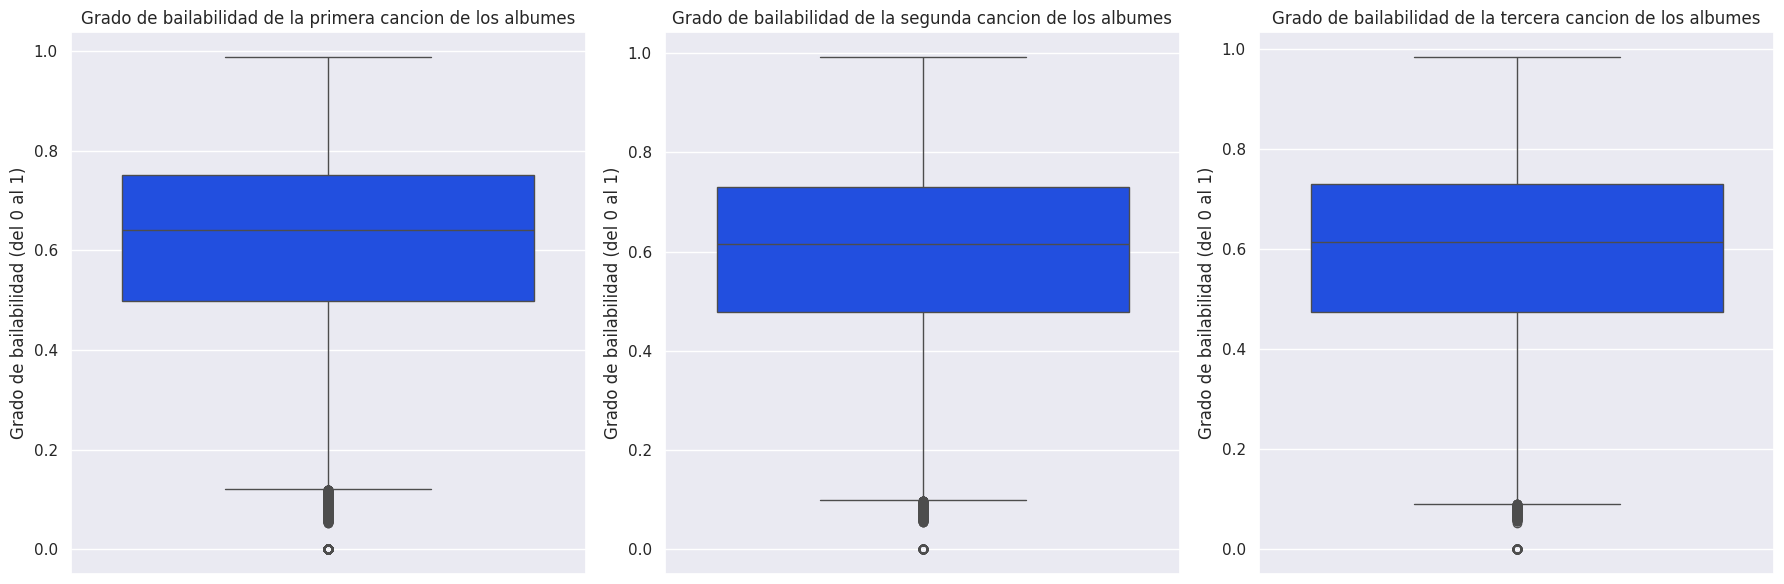

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='t_dance0', ax=axes[0])
axes[0].set_title('Grado de bailabilidad de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='t_dance1', ax=axes[1])
axes[1].set_title('Grado de bailabilidad de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='t_dance2', ax=axes[2])
axes[2].set_title('Grado de bailabilidad de la tercera cancion de los albumes')

axes[0].set_ylabel('Grado de bailabilidad (del 0 al 1)')
axes[1].set_ylabel('Grado de bailabilidad (del 0 al 1)')
axes[2].set_ylabel('Grado de bailabilidad (del 0 al 1)')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

En este grafico podemos ver que, si bien existen datos atípicos en la zona inferior del mismo, no son críticos para el analisis ya que no todas las canciones son hechan para ser bailadas

### OUTLIERS DE ACÚSTICA

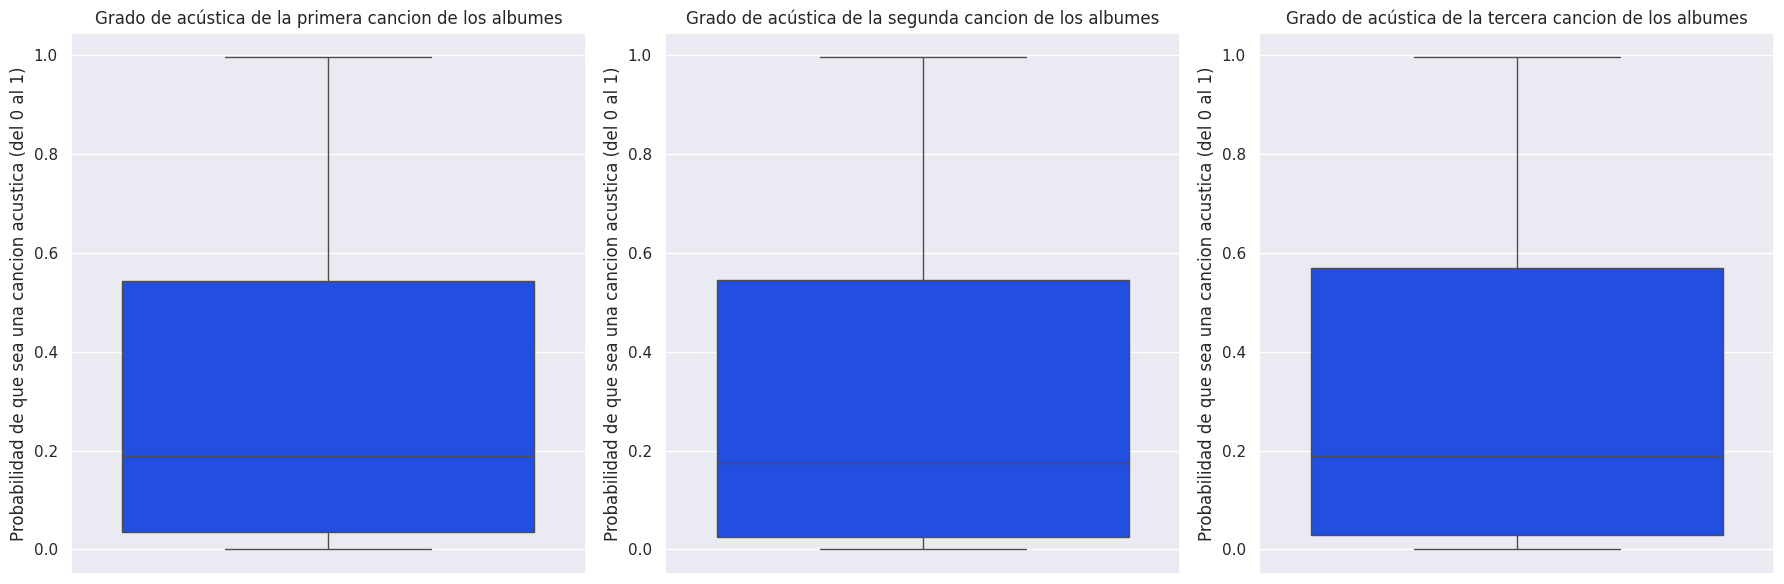

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='t_acous0', ax=axes[0])
axes[0].set_title('Grado de acústica de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='t_acous1', ax=axes[1])
axes[1].set_title('Grado de acústica de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='t_acous2', ax=axes[2])
axes[2].set_title('Grado de acústica de la tercera cancion de los albumes')

axes[0].set_ylabel('Probabilidad de que sea una cancion acustica (del 0 al 1)')
axes[1].set_ylabel('Probabilidad de que sea una cancion acustica (del 0 al 1)')
axes[2].set_ylabel('Probabilidad de que sea una cancion acustica (del 0 al 1)')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

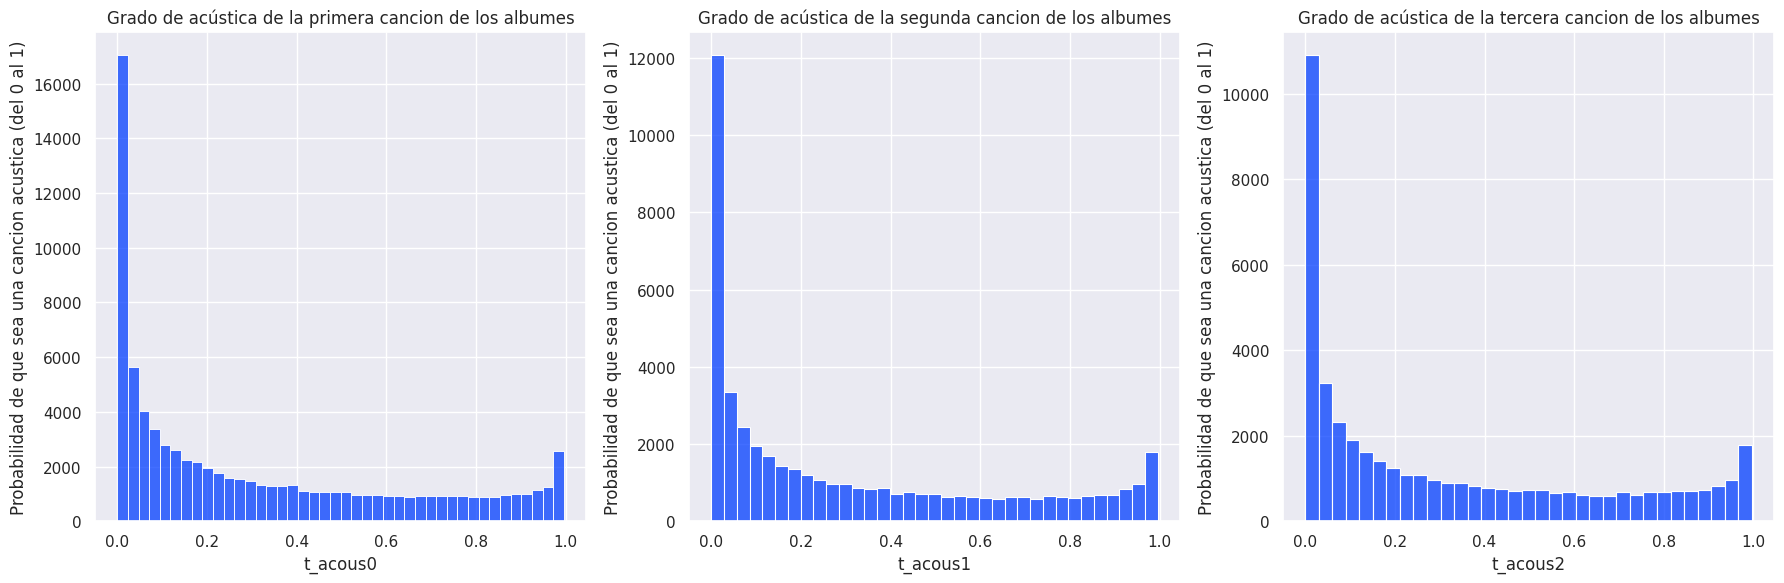

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el primer gráfico en el primer subplot
sns.histplot(df, x='t_acous0', ax=axes[0])
axes[0].set_title('Grado de acústica de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.histplot(df, x='t_acous1', ax=axes[1])
axes[1].set_title('Grado de acústica de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.histplot(df, x='t_acous2', ax=axes[2])
axes[2].set_title('Grado de acústica de la tercera cancion de los albumes')

axes[0].set_ylabel('Probabilidad de que sea una cancion acustica (del 0 al 1)')
axes[1].set_ylabel('Probabilidad de que sea una cancion acustica (del 0 al 1)')
axes[2].set_ylabel('Probabilidad de que sea una cancion acustica (del 0 al 1)')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

No hay información relevante aunque se nota una tendencia a que la mayoría de las canciones pasan a usar instrumentos digitales en vez de acusticos

### OUTLIERS DE INSTRUMENTAL

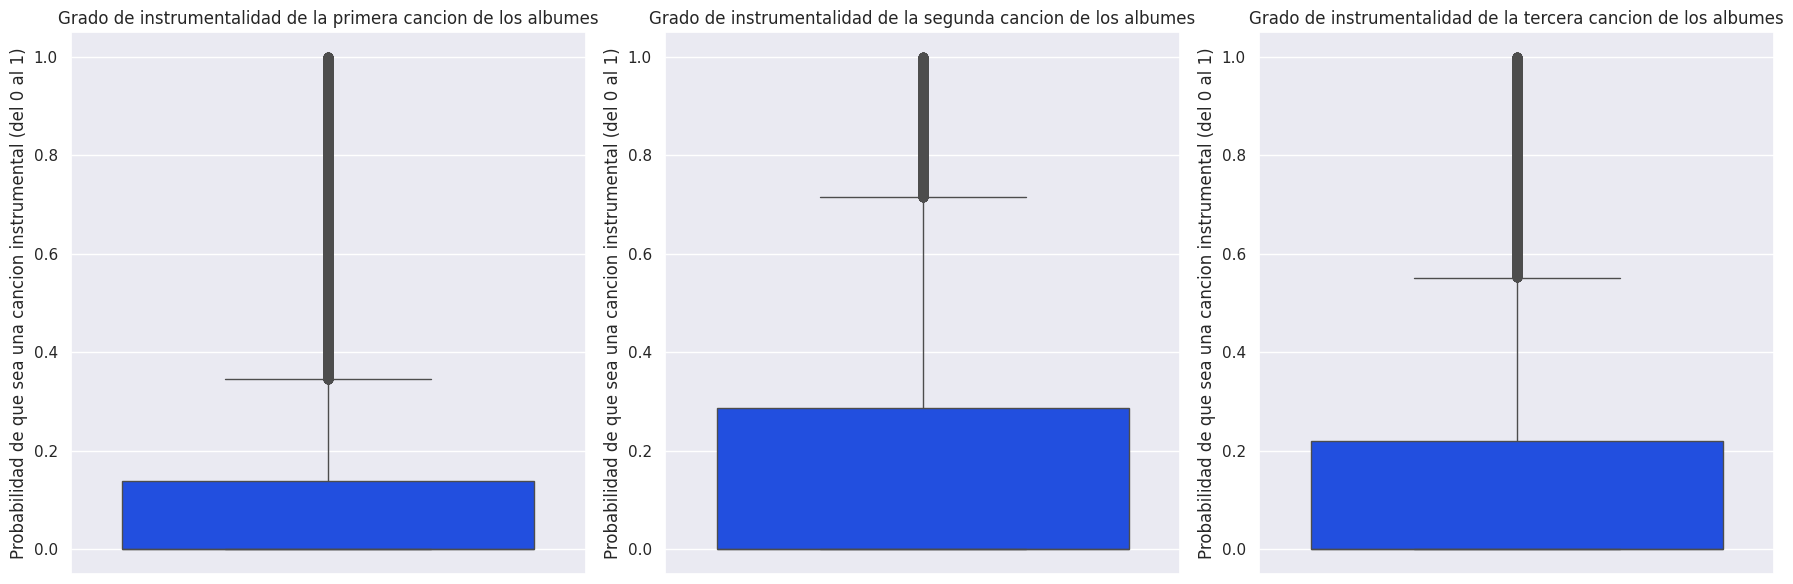

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='t_ins0', ax=axes[0])
axes[0].set_title('Grado de instrumentalidad de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='t_ins1', ax=axes[1])
axes[1].set_title('Grado de instrumentalidad de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='t_ins2', ax=axes[2])
axes[2].set_title('Grado de instrumentalidad de la tercera cancion de los albumes')

axes[0].set_ylabel('Probabilidad de que sea una cancion instrumental (del 0 al 1)')
axes[1].set_ylabel('Probabilidad de que sea una cancion instrumental (del 0 al 1)')
axes[2].set_ylabel('Probabilidad de que sea una cancion instrumental (del 0 al 1)')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

Aunque aparezcan muchos datos atípicos, en realidad solo es la variacion que existe entre canciones instrumentales y con voces. Por ende, no resulta importante dicha "anomalía"

### OUTLIERS DE COMPÁS

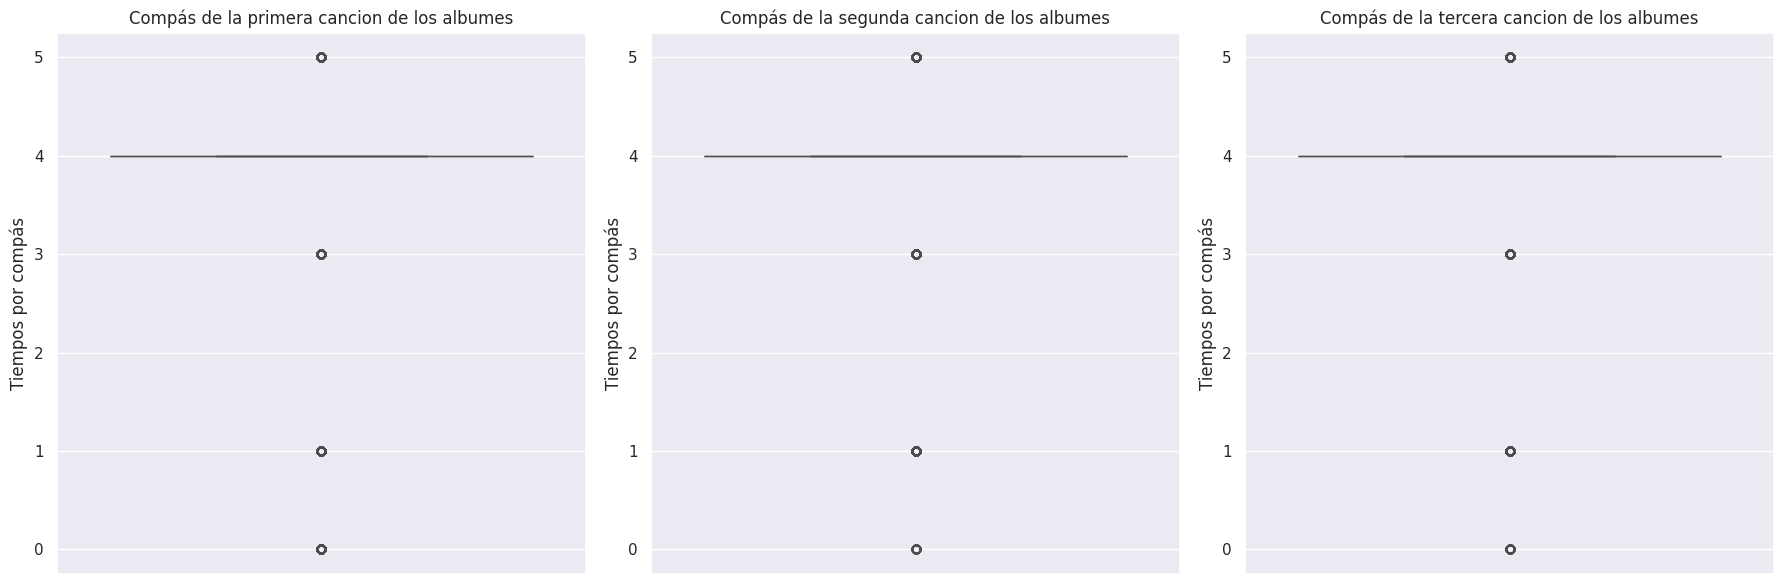

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='t_sig0', ax=axes[0])
axes[0].set_title('Compás de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='t_sig1', ax=axes[1])
axes[1].set_title('Compás de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='t_sig2', ax=axes[2])
axes[2].set_title('Compás de la tercera cancion de los albumes')

axes[0].set_ylabel('Tiempos por compás')
axes[1].set_ylabel('Tiempos por compás')
axes[2].set_ylabel('Tiempos por compás')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

En este gráfico, por mas extraño que se vea, se puede afirmar que el compás de 4 tiempos es el mas comun, aunque el resto de opciones tambien son validas. Sin embargo, se encuentran datos atípicos en el 0, lo cual es imposible para una cancion y debe ser eliminado

## TRATAMIENTO DE OUTLIERS

### ELIMINAR OUTLIERS DE LA DURACION DE CANCIONES

In [ ]:
# CALCULAR RANGO INTERCUARTIL (IQR)
Q1 = df['t_dur0'].quantile(0.25)
Q3 = df['t_dur0'].quantile(0.75)
IQR = Q3 - Q1

# DEFINIR LIMITES PARA IDENTIFICAR OUTLIERS
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# ELIMINACION
df = df[(df['t_dur0'] >= limite_inferior) & (df['t_dur0'] <= limite_superior)]


# CALCULAR RANGO INTERCUARTIL (IQR)
Q1 = df['t_dur1'].quantile(0.25)
Q3 = df['t_dur1'].quantile(0.75)
IQR = Q3 - Q1

# DEFINIR LIMITES PARA IDENTIFICAR OUTLIERS
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# ELIMINACION
df = df[(df['t_dur1'] >= limite_inferior) & (df['t_dur1'] <= limite_superior)]

# CALCULAR RANGO INTERCUARTIL (IQR)
Q1 = df['t_dur2'].quantile(0.25)
Q3 = df['t_dur2'].quantile(0.75)
IQR = Q3 - Q1

# DEFINIR LIMITES PARA IDENTIFICAR OUTLIERS
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# ELIMINACION
df = df[(df['t_dur2'] >= limite_inferior) & (df['t_dur2'] <= limite_superior)]

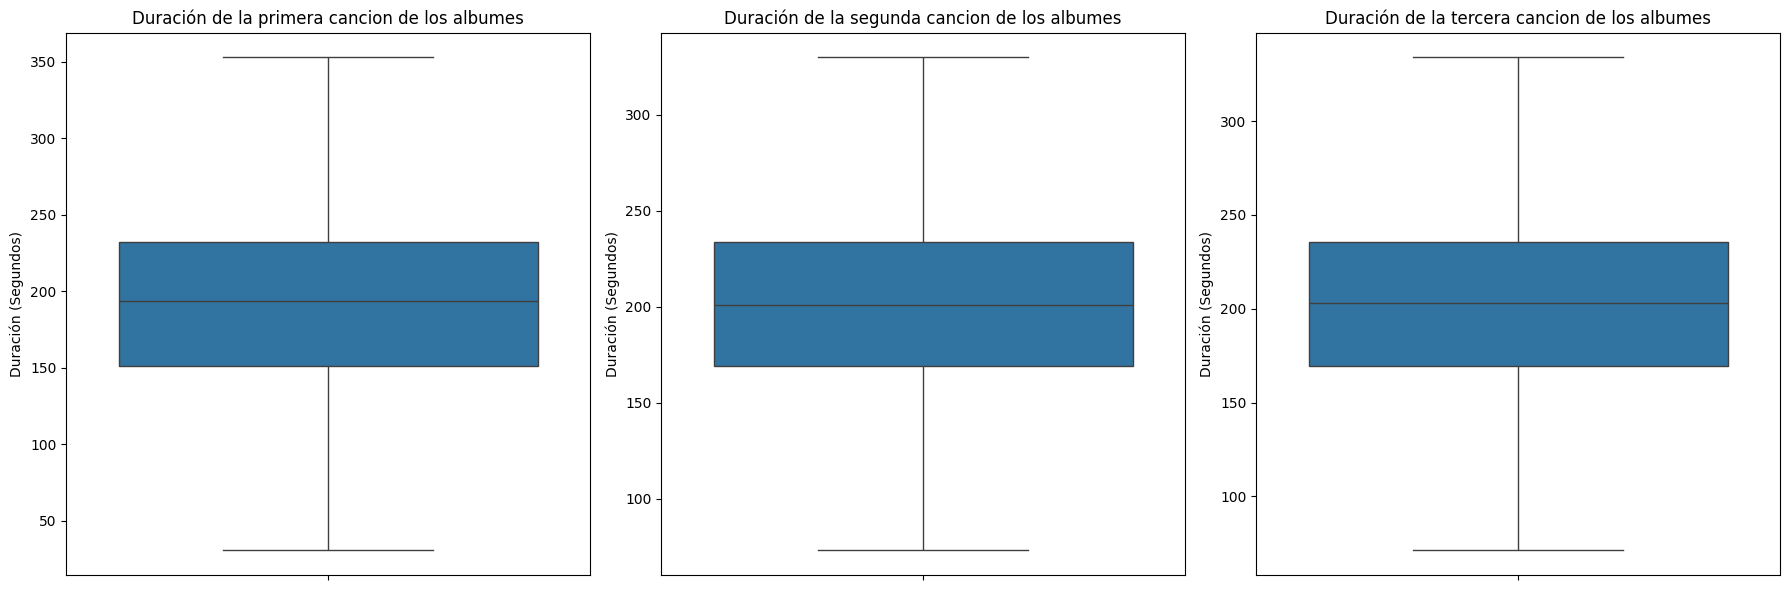

In [ ]:
# MOSTRAR GRÁFICO DE DURACION
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Convertir los milisegundos a segundos
df['duracion_0_segundos'] = df['t_dur0'] / 1000
df['duracion_1_segundos'] = df['t_dur1'] / 1000
df['duracion_2_segundos'] = df['t_dur2'] / 1000

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='duracion_0_segundos', ax=axes[0])
axes[0].set_title('Duración de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='duracion_1_segundos', ax=axes[1])
axes[1].set_title('Duración de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='duracion_2_segundos', ax=axes[2])
axes[2].set_title('Duración de la tercera cancion de los albumes')

axes[0].set_ylabel('Duración (Segundos)')
axes[1].set_ylabel('Duración (Segundos)')
axes[2].set_ylabel('Duración (Segundos)')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

# ELIMINACION DE ATRIBUTOS TEMPORALES
df= df.drop(['duracion_0_segundos', 'duracion_1_segundos', 'duracion_2_segundos'], axis=1)

De esta manera, nos deshacemos de las canciones con duraciones muy altas que traerian problemas a la prediccion

### ELIMINAR OUTLIERS DE LA CANTIDAD DE TRACKS

In [ ]:
# ELIMINAR OUTLIERS SUPERIORES DE LA CANTIDAD DE TRACKS

# CALCULAR RANGO INTERCUARTIL (IQR)
Q1 = df['total_tracks'].quantile(0.25)
Q3 = df['total_tracks'].quantile(0.75)
IQR = Q3 - Q1

# DEFINIR LIMITE PARA IDENTIFICAR OUTLIERS
limite_superior = Q3 + 1.5 * IQR

# ELIMINACION
df = df[(df['total_tracks'] <= limite_superior)]

Text(0, 0.5, 'Cantidad de canciones')

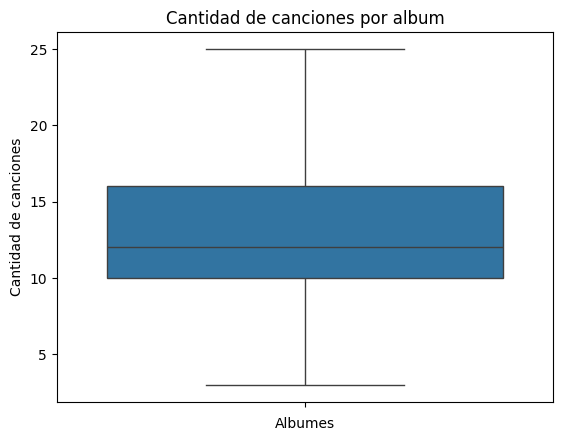

In [ ]:
# MOSTRAR GRÁFICO
sns.boxplot(data=df, y='total_tracks')
plt.title('Cantidad de canciones por album')
plt.xlabel('Albumes')
plt.ylabel('Cantidad de canciones')

Como se puede ver, se ha limpiado el gráfico y los datos ahora son mas concisos, eliminando aquellos albumes unicos que tenian mas de 1000 canciones.

### ELIMINAR OUTLIERS DEL TEMPO

In [ ]:
# ELIMINAR OUTLIER INFERIOR DEL TEMPO0
Q1 = df['t_tempo0'].quantile(0.25)
Q3 = df['t_tempo0'].quantile(0.75)
IQR = Q3 - Q1

# DEFINIR LIMITE INFERIOR
limite_inferior = Q1 - 1.5 * IQR

# ELIMINACION
df = df[df['t_tempo0'] >= limite_inferior]


# ELIMINAR OUTLIER INFERIOR DEL TEMPO1
Q1 = df['t_tempo1'].quantile(0.25)
Q3 = df['t_tempo1'].quantile(0.75)
IQR = Q3 - Q1

# DEFINIR LIMITE INFERIOR
limite_inferior = Q1 - 1.5 * IQR

# ELIMINACION
df = df[df['t_tempo1'] >= limite_inferior]


# ELIMINAR OUTLIER INFERIOR DEL TEMPO2
Q1 = df['t_tempo2'].quantile(0.25)
Q3 = df['t_tempo2'].quantile(0.75)
IQR = Q3 - Q1

# DEFINIR LIMITE INFERIOR
limite_inferior = Q1 - 1.5 * IQR

# ELIMINACION
df = df[df['t_tempo2'] >= limite_inferior]

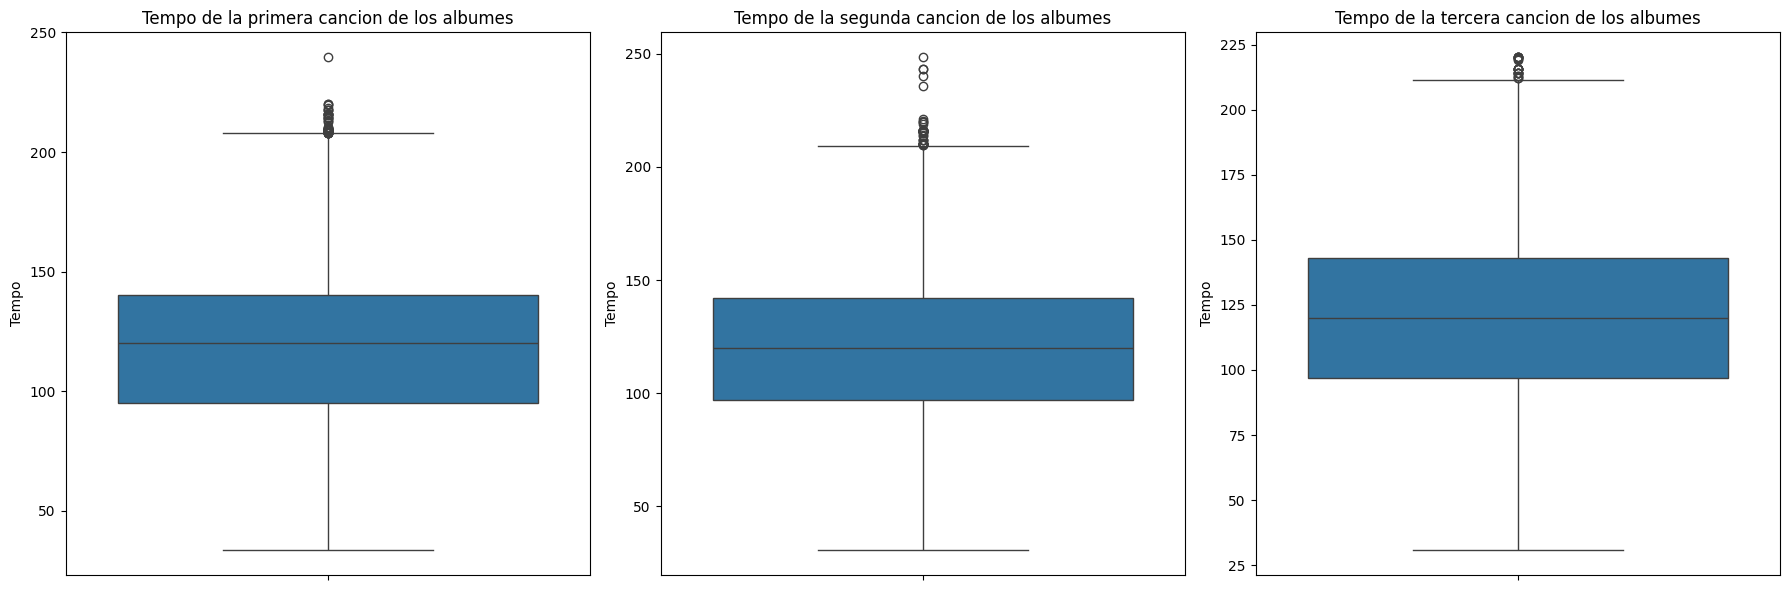

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='t_tempo0', ax=axes[0])
axes[0].set_title('Tempo de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='t_tempo1', ax=axes[1])
axes[1].set_title('Tempo de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='t_tempo2', ax=axes[2])
axes[2].set_title('Tempo de la tercera cancion de los albumes')

axes[0].set_ylabel('Tempo')
axes[1].set_ylabel('Tempo')
axes[2].set_ylabel('Tempo')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

De esta manera, nos deshacemos de los valores cerca del 0 y nos mantenemos con el resto que siguen siendo realistas y útiles

### ELIMINAR OUTLIERS DEL COMPÁS

In [ ]:
# ELIMINAR DATOS OUTLIERS DEL COMPÁS
df = df[df['t_sig0'] != 0]
df = df[df['t_sig1'] != 0]
df = df[df['t_sig2'] != 0]

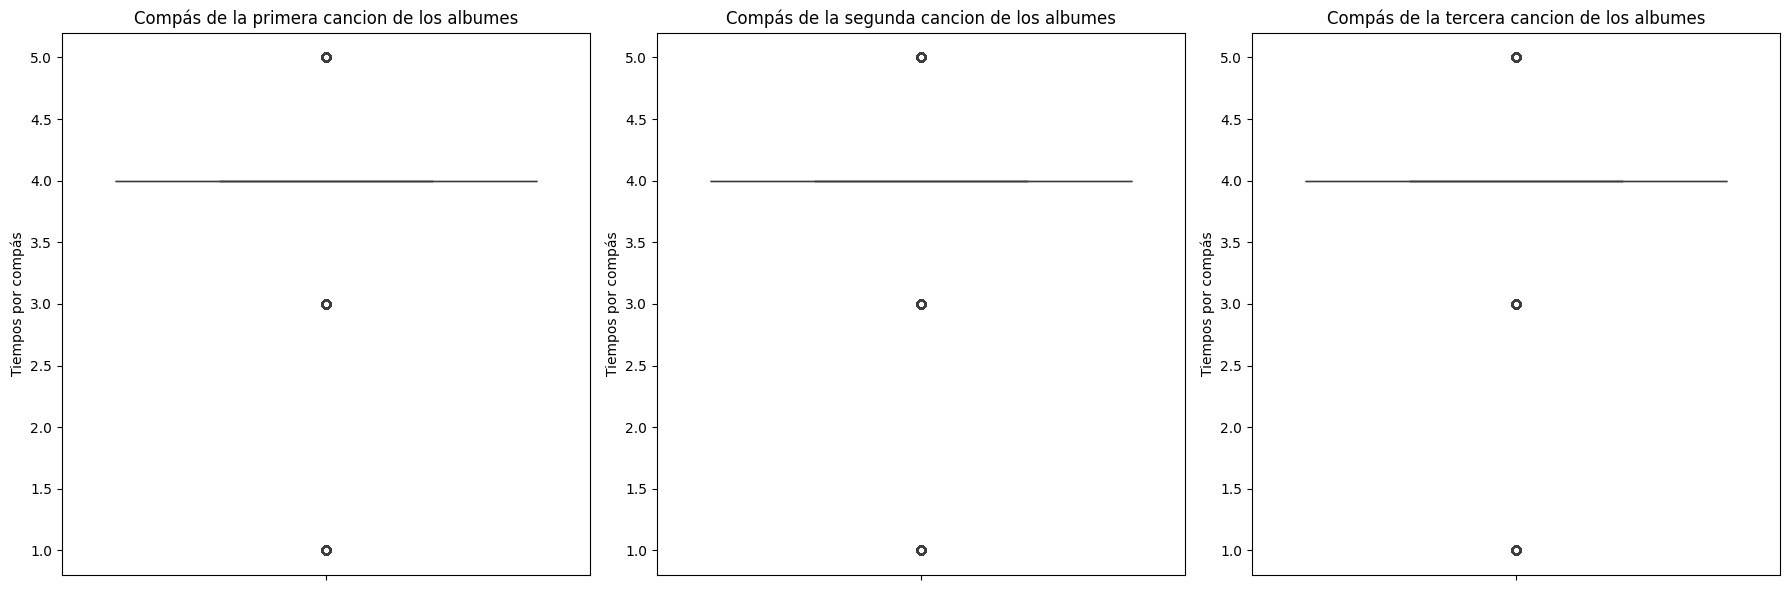

In [ ]:
# Configurar el diseño de los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar el primer gráfico en el primer subplot
sns.boxplot(df, y='t_sig0', ax=axes[0])
axes[0].set_title('Compás de la primera cancion de los albumes')

# Graficar el segundo gráfico en el segundo subplot
sns.boxplot(df, y='t_sig1', ax=axes[1])
axes[1].set_title('Compás de la segunda cancion de los albumes')

# Graficar el tercer gráfico en el tercer subplot
sns.boxplot(df, y='t_sig2', ax=axes[2])
axes[2].set_title('Compás de la tercera cancion de los albumes')

axes[0].set_ylabel('Tiempos por compás')
axes[1].set_ylabel('Tiempos por compás')
axes[2].set_ylabel('Tiempos por compás')

# Ajustar la disposición y mostrar los gráficos
plt.tight_layout()
plt.show()

De esta manera, hemos eliminado los datos que se encontraban en 0 tiempos por compás, por lo que ahora tenemos datos realistas.

# NULOS

## UBICACIÓN DE NULOS

In [ ]:
print(df.isnull().sum())

total_tracks    0
t_dur0          0
t_dur1          0
t_dur2          0
t_dance0        0
t_dance1        0
t_dance2        0
t_energy0       0
t_energy1       0
t_energy2       0
t_key0          0
t_key1          0
t_key2          0
t_mode0         0
t_mode1         0
t_mode2         0
t_speech0       0
t_speech1       0
t_speech2       0
t_acous0        0
t_acous1        0
t_acous2        0
t_ins0          0
t_ins1          0
t_ins2          0
t_live0         0
t_live1         0
t_live2         0
t_val0          0
t_val1          0
t_val2          0
t_tempo0        0
t_tempo1        0
t_tempo2        0
t_sig0          0
t_sig1          0
t_sig2          0
popularity      0
dtype: int64


In [ ]:
# PORCENTAJE DE NULOS POR COLUMNA
porcentaje_nulos = df.isnull().sum() * 100 / len(df)
porcentaje_nulos

total_tracks    0.0
t_dur0          0.0
t_dur1          0.0
t_dur2          0.0
t_dance0        0.0
t_dance1        0.0
t_dance2        0.0
t_energy0       0.0
t_energy1       0.0
t_energy2       0.0
t_key0          0.0
t_key1          0.0
t_key2          0.0
t_mode0         0.0
t_mode1         0.0
t_mode2         0.0
t_speech0       0.0
t_speech1       0.0
t_speech2       0.0
t_acous0        0.0
t_acous1        0.0
t_acous2        0.0
t_ins0          0.0
t_ins1          0.0
t_ins2          0.0
t_live0         0.0
t_live1         0.0
t_live2         0.0
t_val0          0.0
t_val1          0.0
t_val2          0.0
t_tempo0        0.0
t_tempo1        0.0
t_tempo2        0.0
t_sig0          0.0
t_sig1          0.0
t_sig2          0.0
popularity      0.0
dtype: float64

In [ ]:
df.shape

(86598, 38)

Como podemos ver, luego de la eliminacion de outliers nos hemos quedado sin nulos, por lo que podemos pasar directamente al modelado.

# MODELADO

## SEPARACIÓN DE VARIABLES

In [ ]:
# SELECCION DE VARIABLES
X = df.drop(['popularity'],axis=1)
Y = df['popularity']

In [ ]:
# SEPARACION DE DATOS 70/30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=16)

print('x_train size',X_train.shape)
print('Y_train size',Y_train.shape)
print('x_test size',X_test.shape)
print('Y_test size',Y_test.shape)

x_train size (69278, 37)
Y_train size (69278,)
x_test size (17320, 37)
Y_test size (17320,)


## REGRESION LINEAL

In [ ]:
# instanciamos el modelo
model = LinearRegression()

In [ ]:
# entrenamos
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# prediccion
Y_pred = model.predict(X_test)

## XGBOOST

In [ ]:
model = XGBRegressor(n_estimators= 2000 , max_depth= 6 , learning_rate = 0.01)

In [ ]:
# entrenamos
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# prediccion
Y_pred = model.predict(X_test)

## KNN

In [ ]:
# instanciamos el modelo
model = KNN(n_neighbors=20,weights="distance",metric="manhattan")

In [ ]:
# entrenamos
model.fit(X_train, Y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=20, weights='distance')

In [ ]:
# prediccion
Y_pred = model.predict(X_test)

## RANDOM FOREST

In [ ]:
model = RandomForestRegressor(n_estimators=30, random_state=42)

In [ ]:
# entrenamos
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=30, random_state=42)

In [ ]:
# prediccion
Y_pred = model.predict(X_test)

# VALIDACIÓN

## REGRESIÓN LINEAL

In [ ]:
# metrica R2
r2_rl = r2_score(Y_test, Y_pred)
print("R2",r2_rl)

# metrica mae
mae_rl = metrics.mean_absolute_error(Y_test,Y_pred)
print("MAE",mae_rl)

# metrica mse
mse_rl = metrics.mean_squared_error(Y_test,Y_pred)
print("MSE",mse_rl)

# metrica rmse
rmse_rl = np.sqrt(mse_rl)
print("RMSE",rmse_rl)

R2 0.1789255560636971
MAE 15.020858246427798
MSE 351.6553471588894
RMSE 18.752475760786613


## XGBOOST

In [ ]:
# metrica R2
r2_xgb = r2_score(Y_test, Y_pred)
print("R2",r2_xgb)

# metrica mae
mae_xgb = metrics.mean_absolute_error(Y_test,Y_pred)
print("MAE",mae_xgb)

# metrica mse
mse_xgb = metrics.mean_squared_error(Y_test,Y_pred)
print("MSE",mse_xgb)

# metrica rmse
rmse_xgb = np.sqrt(mse_xgb)
print("RMSE",rmse_xgb)

R2 0.6555436454467762
MAE 8.354997914953815
MSE 147.52611025230786
RMSE 12.146032696000281


## KNN

In [ ]:
# metrica R2
r2_knn = r2_score(Y_test, Y_pred)
print("R2",r2_knn)

# metrica mae
mae_knn = metrics.mean_absolute_error(Y_test,Y_pred)
print("MAE",mae_knn)

# metrica mse
mse_knn = metrics.mean_squared_error(Y_test,Y_pred)
print("MSE",mse_knn)

# metrica rmse
rmse_knn = np.sqrt(mse_knn)
print("RMSE",rmse_knn)

R2 0.5847162035550948
MAE 5.694380831516963
MSE 177.86056877885719
RMSE 13.336437634498097


## RANDOM FOREST

In [ ]:
# metrica R2
r2_rf = r2_score(Y_test, Y_pred)
print("R2",r2_rf)

# metrica mae
mae_rf = metrics.mean_absolute_error(Y_test,Y_pred)
print("MAE",mae_rf)

# metrica mse
mse_rf = metrics.mean_squared_error(Y_test,Y_pred)
print("MSE",mse_rf)

# metrica rmse
rmse_rf = np.sqrt(mse_rf)
print("RMSE",rmse_rf)

R2 0.7922668263556819
MAE 4.4171667661263765
MSE 88.96937644788956
RMSE 9.43235794740051


# CONCLUSIÓN

In [ ]:
# REDONDEANDO VALORES DE LA METRICA R2 PARA COMPARAR SU PORCENTAJE DE EFICACIA
print(f'RESULTADO REGRESION LINEAL: {r2_rl*100//1}%')
print(f'RESULTADO XGBOOST: {r2_xgb*100//1}%')
print(f'RESULTADO KNN: {r2_knn*100//1}%')
print(f'RESULTADO RANDOM FOREST: {r2_rf*100//1}%')

RESULTADO REGRESION LINEAL: 17.0%
RESULTADO XGBOOST: 65.0%
RESULTADO KNN: 58.0%
RESULTADO RANDOM FOREST: 79.0%


De esta manera, el algoritmo que mejor logra predecir el porcentaje de popularidad de un álbum musical del 0 al 100% en base a los atributos de entrenamiento es el **Random Forest** con un **79%** de eficacia.

Este resultado se ha conseguido luego de un análisis exploratorio del dataset extraído de Kaggle, eliminando las **columnas inncesarias** para el modelo, graficando las **correlaciones** entre variables, identificando elementos **duplicados**, **outliers** y **nulos**. Al mismo tiempo, tras prueba y error, se han sacado conclusiones de que la eliminacion de datos duplicados **afectaban negativamente** el rendimiento del algoritmo, llegando a rondar cerca del **0.1**, haciendonos dar cuenta de que la repetición es un factor natural del dataset y, a su vez, fundamental para el algoritmo.

Asímismo, la etapa de **eliminacion de outliers** ha resultado, consecuentemente, en la **eliminacion de datos nulos**, lo cual nos ahorró un paso para llegar a la etapa de modelado y predicción. Finalmente, luego de repetir en ciclos el proceso de eleccion de algoritmo, prediccion y evaluacion, se ha llegado a concluir que el metodo de **Random Forest** es el que mejor se logra amoldar a la estructura del dataset, demostrandose en su capacidad de explicar el **79%** de los datos de prueba.